In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_test.shape
#Reshaping both the train and test is necessary so to overlap with the labels and name them correctly 
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
#This is just for the lables 
classes=["airplane","automobile","bird","dog","cat","deer","frog","horse","ship","truck"]


'truck'

In [5]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

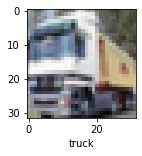

In [6]:
plot_sample(X_train,y_train,1)

In [7]:
#This is done in order to get them in between 0 and 1 
X_train = X_train/255
X_test=X_test/255

In [33]:
 cnn = models.Sequential([
     
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3) , activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
     
    layers.Conv2D(filters=32, kernel_size=(3,3) , activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
     
    layers.Conv2D(filters=64, kernel_size=(3,3) , activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
  
    #dense 
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [34]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [35]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5246 - accuracy: 0.4413
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1836 - accuracy: 0.5778
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0276 - accuracy: 0.6377
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9278 - accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8410 - accuracy: 0.7055
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7687 - accuracy: 0.7310
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7082 - accuracy: 0.7515
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6435 - accuracy: 0.7720
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5847 - accuracy: 0.7946
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9641 - accuracy: 0.6952


[0.9640650153160095, 0.6952000260353088]

In [37]:
y_test = y_test.reshape(-1,)

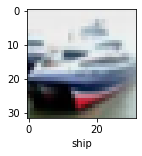

In [38]:
plot_sample(X_test,y_test,1)

In [39]:
y_pred= cnn.predict(X_test)
y_pred[:5]

array([[2.80152279e-04, 2.26319935e-02, 6.18170761e-02, 8.23530793e-01,
        5.74944534e-05, 5.36941644e-03, 1.01883654e-02, 1.55091716e-03,
        7.32262656e-02, 1.34748453e-03],
       [2.98677420e-04, 5.41700050e-02, 1.04663644e-09, 1.50569321e-10,
        7.29162499e-13, 2.23770048e-12, 2.51410337e-10, 6.47600951e-13,
        9.45442498e-01, 8.87876377e-05],
       [2.91587953e-02, 2.18216121e-01, 2.51703034e-03, 1.56052294e-03,
        4.41120035e-04, 7.58468057e-04, 3.03209468e-04, 9.92026646e-04,
        7.20891416e-01, 2.51613706e-02],
       [2.76281238e-01, 3.35465185e-03, 3.89060527e-02, 3.52469552e-03,
        2.59744731e-04, 9.40934915e-05, 4.88820478e-05, 2.88651989e-07,
        6.77143455e-01, 3.86931380e-04],
       [4.27607200e-10, 1.08519686e-07, 2.15878215e-04, 4.86789155e-04,
        9.90148544e-01, 9.62677659e-05, 9.05225240e-03, 1.82739427e-07,
        7.27481464e-10, 2.80142043e-09]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

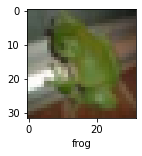

In [44]:
plot_sample(X_test, y_test,7)

In [45]:
classes[y_classes[7]]

'frog'